In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_context("talk")

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [ ]:
ls data

In [24]:
path = 'data/crime_rockets_finalB.csv'
team = 'Houston Rockets '
df = pd.read_csv(path)
#df.drop(['date','dist_stadium_meadian','premise_mode'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

nogame = df.game =='No Game'
df = df[~nogame]


#df.drop(['month','offense_mode'],axis=1,inplace=True) # 239
#df.drop(['month','offense_mode','premise_mode'],axis=1,inplace=True) # 121
#df.drop(['month','offense_mode','season'],axis=1,inplace=True) # 236
#df.drop(['offense_mode','season',],axis=1,inplace=True) # 263
#df.drop(['offense_mode','dist_stadium_meadian'],axis=1,inplace=True) # 245
#df.drop(['weekday','dist_stadium_meadian'],axis=1,inplace=True) # 258
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 136
#df.drop(['offense_mode','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 135
#df.drop(['offense_mode','premise_mode','season','dist_stadium_meadian'],axis=1,inplace=True) # 135
#df.drop(['offense_mode','season','premise_mode'],axis=1,inplace=True) # 152
#df.drop(['premise_mode','offense_mode'],axis=1,inplace=True) # 152
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) #  136

In [25]:
### get dummies
dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace("'", '') for c in dfd.columns]
dfd.columns = [c.replace(".", '') for c in dfd.columns]
dfd.columns = [c.replace("&", 'n') for c in dfd.columns]
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,...,premise_mode_rest_prk,premise_mode_store,premise_mode_store_prk,premise_mode_street,premise_mode_unk,offense_mode_Auto_Theft,offense_mode_Rape,offense_mode_Robbery,offense_mode_Theft,game_Won_Game
8,12,2010,0.513558,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
12,6,2010,0.671751,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
14,13,2010,0.473241,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,10,2010,0.603914,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
22,11,2010,0.469594,23,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula
#form = 'crime_total ~ hour_mode + year'
m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.321
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     2.817
Date:                Thu, 26 Jul 2018   Prob (F-statistic):           7.33e-08
Time:                        16:29:32   Log-Likelihood:                -834.43
No. Observations:                 328   AIC:                             1765.
Df Residuals:                     280   BIC:                             1947.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
8,12,Saturday,Jan,2010,0.513558,Winter,Night,0,street,Theft,Won Game
12,6,Wednesday,Jan,2010,0.671751,Winter,Afternoon,0,bus_rail,Theft,Won Game
14,13,Friday,Jan,2010,0.473241,Winter,Afternoon,0,comm prk,Theft,Lost Game
17,10,Monday,Jan,2010,0.603914,Winter,Night,21,comm prk,Theft,Won Game
22,11,Saturday,Jan,2010,0.469594,Winter,Night,23,house,Theft,Lost Game


## EDA & Summary Statistics

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


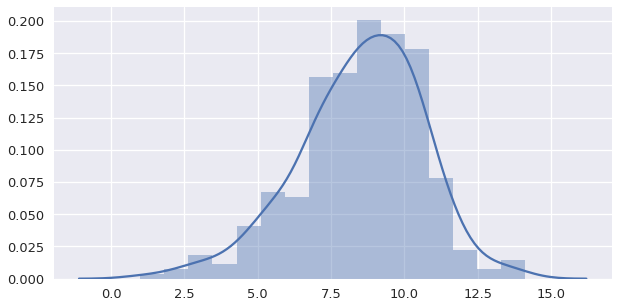

In [28]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(m.fittedvalues)
plt.show()

/home/frank/miniconda3/envs/springboard/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


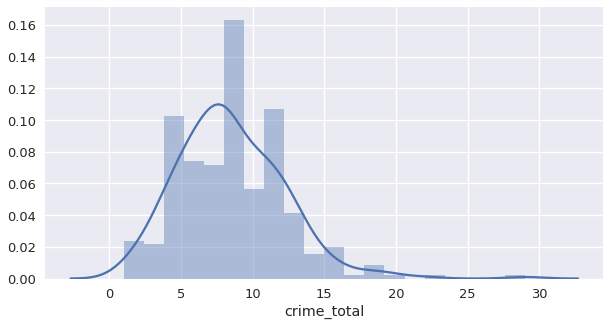

In [29]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(dfd['crime_total'])
plt.show()

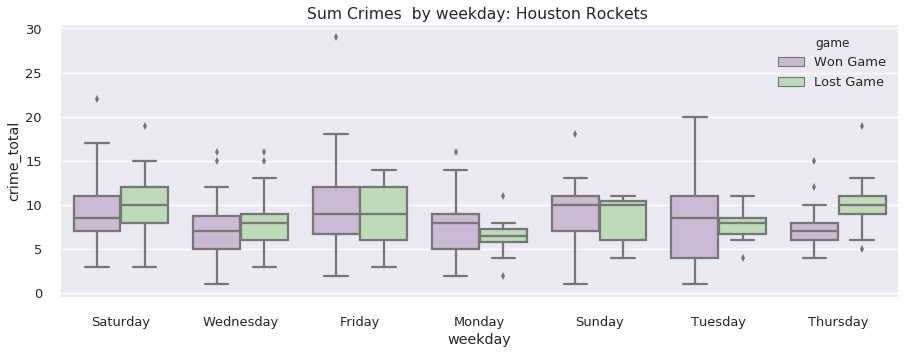

In [30]:
title = 'Sum Crimes  by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))


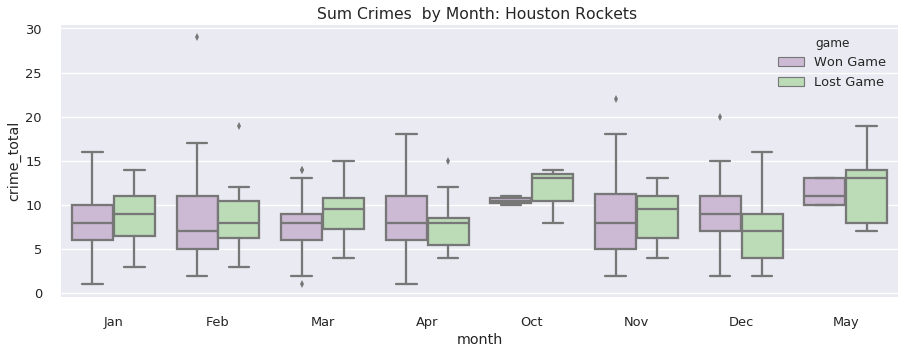

In [31]:
title = 'Sum Crimes  by Month: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="month", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

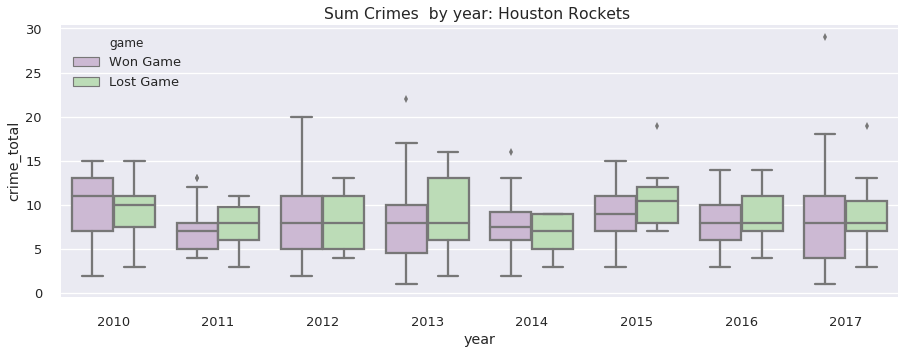

In [32]:
title = 'Sum Crimes  by year: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="year", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

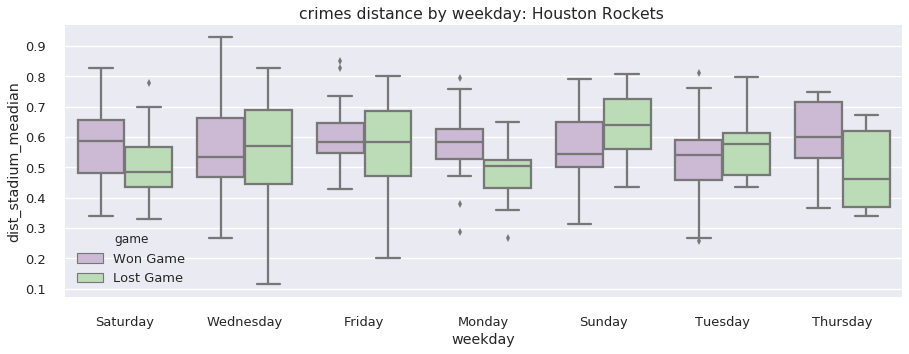

In [33]:
title = 'crimes distance by weekday: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="dist_stadium_meadian", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

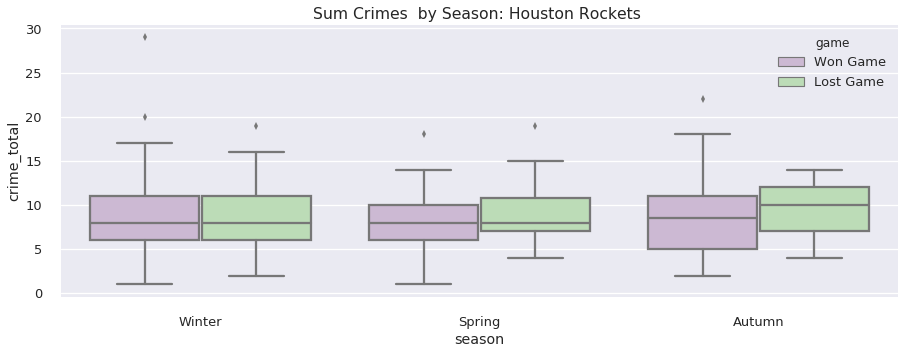

In [34]:
title = 'Sum Crimes  by Season: {}'.format(team)
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="season", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)

plt.title(title)
plt.savefig(title.replace(' ','_'))
plt.show()

## Relationships

## linear regression

In [35]:
from sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [36]:
def modelfit(alg, X,y):
    '''
    target = y
    predictors = X
    '''
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
    #Predict training set:
    train_predictions = alg.predict(X_train)
    #Perform cross-validation:
    cv_score = cross_val_score(alg, X, y, cv=10, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    print ("CV Score : Mean  %.4g | Std  %.4g | Min  %.4g | Max  %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
)

In [37]:
alg1 = LinearRegression(normalize=True)
alg2 = Ridge(alpha=0.1,normalize=True)
alg3 = Lasso(alpha=0.1,normalize=True)
X_cols = list(X.columns)

In [38]:
coef1.head()

premise_mode_auto_repair   -6.082603e+15
month_Jul                  -3.315539e+14
month_Aug                  -3.315539e+14
month_Jun                  -3.315539e+14
month_Dec                  -1.830047e+14
dtype: float64


Model Report
RMSE : 3.04
CV Score : Mean  2.718e+06 | Std  8.084e+06 | Min  2.718 | Max  2.697e+07


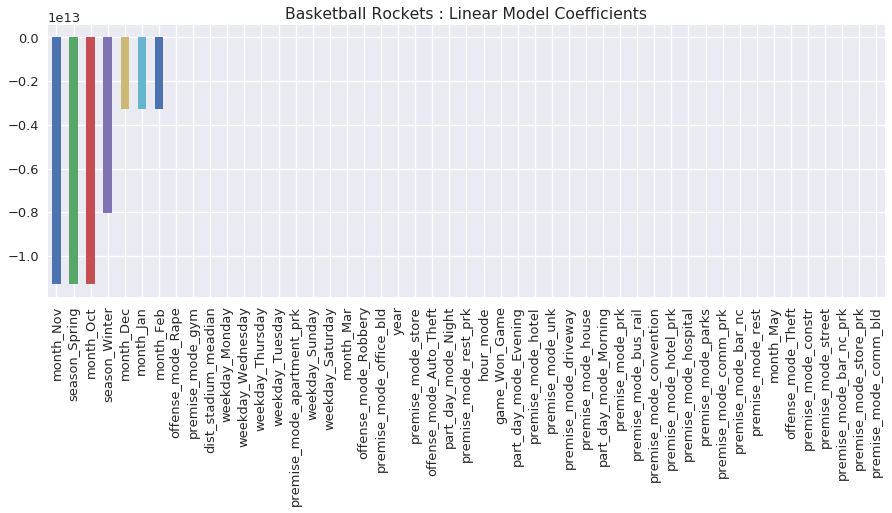

In [39]:
title = 'Basketball Rockets : Linear Model Coefficients'
modelfit(alg1,X,y)
coef1 = pd.Series(alg1.coef_, X_cols).sort_values()
coef1.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 3.079
CV Score : Mean  3.47 | Std  0.7354 | Min  2.501 | Max  5.116


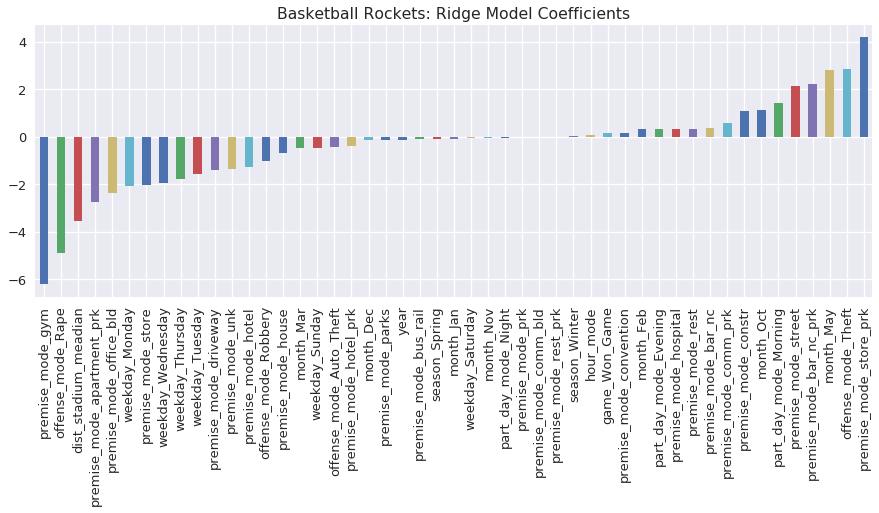

In [40]:
title = 'Basketball Rockets: Ridge Model Coefficients'

modelfit(alg2,X,y)
coef2 = pd.Series(alg2.coef_, X_cols).sort_values()
coef2.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()


Model Report
RMSE : 3.907
CV Score : Mean  3.689 | Std  0.8254 | Min  2.687 | Max  5.62


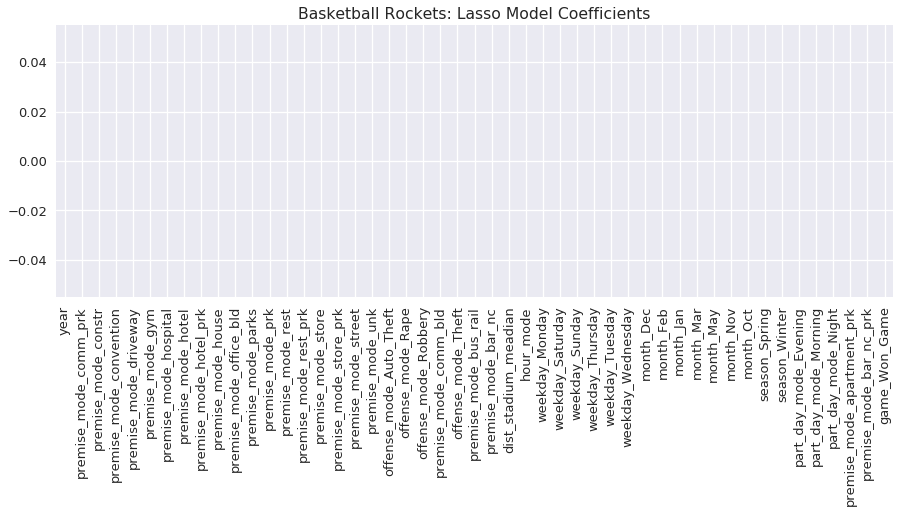

In [41]:


title = 'Basketball Rockets: Lasso Model Coefficients'
modelfit(alg3,X,y)
coef3 = pd.Series(alg3.coef_, X_cols).sort_values()
coef3.plot(kind='bar', title=title,figsize=(15,5))
plt.savefig(title.replace(' ','_'),bbox_inches="tight")
plt.show()